<a href="https://colab.research.google.com/github/Srijita264/HAR-using-image-classification/blob/main/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/HAR Dataset

/content/drive/MyDrive/HAR Dataset


In [ ]:
pip install  pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.2 MB/s eta 0:00:00


In [ ]:
import os
import csv
import shutil
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pyts.image import GramianAngularField
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
fig = 0

In [ ]:
train_path = '/content/drive/MyDrive/Train'
test_path = '/content/drive/MyDrive/Test'

In [ ]:
demo = '/content/drive/MyDrive/GADF_Test_Avg_1'
if not os.path.exists(demo):
    os.makedirs(demo)

In [ ]:
a = [i for i in os.listdir(train_path)]

In [ ]:
a

['body_gyro_y_train.csv',
 'body_gyro_z_train.csv',
 'body_gyro_x_train.csv',
 'body_acc_z_train.csv',
 'body_acc_x_train.csv',
 'body_acc_y_train.csv',
 'y_train.csv']

In [ ]:
def read_acc_x_test(file_name,index):
  df = pd.read_csv(os.path.join(test_path, file_name), header= None)
  df_1 = df.iloc[index,0]
  df_1 = df_1.lstrip()
  df_1 = df_1.rstrip()
  df_1 = df_1.replace(" ", ",")
  df_1 = df_1.replace(",,",",")
  df_1 = df_1.split(",")
  df_2 = np.array(df_1,dtype=float)
  df_2 = df_2.reshape(1,-1)
  gaf = GramianAngularField(image_size=128, method='difference')
  gaf_image = gaf.fit_transform(df_2)[0]
  return gaf_image

In [ ]:
def read_acc_y_test(file_name,index):
  df = pd.read_csv(os.path.join(test_path, file_name), header= None)
  df_1 = df.iloc[index,0]
  df_1 = df_1.lstrip()
  df_1 = df_1.rstrip()
  df_1 = df_1.replace(" ", ",")
  df_1 = df_1.replace(",,",",")
  df_1 = df_1.split(",")
  df_2 = np.array(df_1,dtype=float)
  df_2 = df_2.reshape(1,-1)
  gaf = GramianAngularField(image_size=128, method='difference')
  gaf_image = gaf.fit_transform(df_2)[0]
  return gaf_image

In [ ]:
def read_acc_z_test(file_name,index):
  df = pd.read_csv(os.path.join(test_path, file_name), header= None)
  df_1 = df.iloc[index,0]
  df_1 = df_1.lstrip()
  df_1 = df_1.rstrip()
  df_1 = df_1.replace(" ", ",")
  df_1 = df_1.replace(",,",",")
  df_1 = df_1.split(",")
  df_2 = np.array(df_1,dtype=float)
  df_2 = df_2.reshape(1,-1)
  gaf = GramianAngularField(image_size=128, method='difference')
  gaf_image = gaf.fit_transform(df_2)[0]
  return gaf_image

In [ ]:
def read_gyr_x_test(file_name,index):
  df = pd.read_csv(os.path.join(test_path, file_name), header= None)
  df_1 = df.iloc[index,0]
  df_1 = df_1.lstrip()
  df_1 = df_1.rstrip()
  df_1 = df_1.replace(" ", ",")
  df_1 = df_1.replace(",,",",")
  df_1 = df_1.split(",")
  df_2 = np.array(df_1,dtype=float)
  df_2 = df_2.reshape(1,-1)
  gaf = GramianAngularField(image_size=128, method='difference')
  gaf_image = gaf.fit_transform(df_2)[0]
  return gaf_image

In [ ]:
def read_gyr_y_test(file_name,index):
  df = pd.read_csv(os.path.join(test_path, file_name), header= None)
  df_1 = df.iloc[index,0]
  df_1 = df_1.lstrip()
  df_1 = df_1.rstrip()
  df_1 = df_1.replace(" ", ",")
  df_1 = df_1.replace(",,",",")
  df_1 = df_1.split(",")
  df_2 = np.array(df_1,dtype=float)
  df_2 = df_2.reshape(1,-1)
  gaf = GramianAngularField(image_size=128, method='difference')
  gaf_image = gaf.fit_transform(df_2)[0]
  return gaf_image

In [ ]:
def read_gyr_z_test(file_name,index):
  df = pd.read_csv(os.path.join(test_path, file_name), header= None)
  df_1 = df.iloc[index,0]
  df_1 = df_1.lstrip()
  df_1 = df_1.rstrip()
  df_1 = df_1.replace(" ", ",")
  df_1 = df_1.replace(",,",",")
  df_1 = df_1.split(",")
  df_2 = np.array(df_1,dtype=float)
  df_2 = df_2.reshape(1,-1)
  gaf = GramianAngularField(image_size=128, method='difference')
  gaf_image = gaf.fit_transform(df_2)[0]
  return gaf_image

In [ ]:

labels_df = pd.read_csv('/content/drive/MyDrive/y_test.csv', header=None)

# Loop through each row in the labels dataframe
for index, row in labels_df.iterrows():
    if index >= 0:
        label = row[0]
        gaf1 = read_acc_x_test('Copy of body_acc_x_test.csv', index)
        gaf2 = read_acc_y_test('Copy of body_acc_x_test.csv', index)
        gaf3 = read_acc_z_test('Copy of body_acc_x_test.csv', index)
        gaf4 = read_gyr_x_test('Copy of body_gyro_x_test.csv', index)
        gaf5 = read_gyr_y_test('Copy of body_gyro_y_test.csv', index)
        gaf6 = read_gyr_z_test('Copy of body_gyro_z_test.csv', index)

        gaf_mean = np.mean((gaf1, gaf2, gaf3, gaf4, gaf5, gaf6), axis=0)

        # Create subdirectories if they don't exist
        class_dir = os.path.join(demo, f"Class {label}")
        os.makedirs(class_dir, exist_ok=True)

        # Save the image directly without displaying it
        plt.imsave(os.path.join(class_dir, f"{index+1}.png"), gaf_mean, cmap='coolwarm', format='png', origin='lower', dpi=300)

Found 6304 images belonging to 6 classes.
Found 1048 images belonging to 6 classes.
Found 2947 images belonging to 6 classes.
Epoch 1/12
197/197 [==============================] - 1225s 6s/step - loss: 1.6199 - accuracy: 0.2524 - val_loss: 1.0612 - val_accuracy: 0.5191
Epoch 2/12
197/197 [==============================] - 599s 3s/step - loss: 0.9310 - accuracy: 0.5652 - val_loss: 0.7637 - val_accuracy: 0.6460
Epoch 3/12
197/197 [==============================] - 616s 3s/step - loss: 0.6755 - accuracy: 0.6800 - val_loss: 0.6422 - val_accuracy: 0.6823
Epoch 4/12
197/197 [==============================] - 636s 3s/step - loss: 0.5767 - accuracy: 0.7262 - val_loss: 0.6480 - val_accuracy: 0.6813
Epoch 5/12
197/197 [==============================] - 591s 3s/step - loss: 0.5138 - accuracy: 0.7589 - val_loss: 0.7663 - val_accuracy: 0.6775
Epoch 6/12
197/197 [==============================] - 619s 3s/step - loss: 0.4435 - accuracy: 0.8057 - val_loss: 0.8015 - val_accuracy: 0.6765
Epoch 7/12
197/

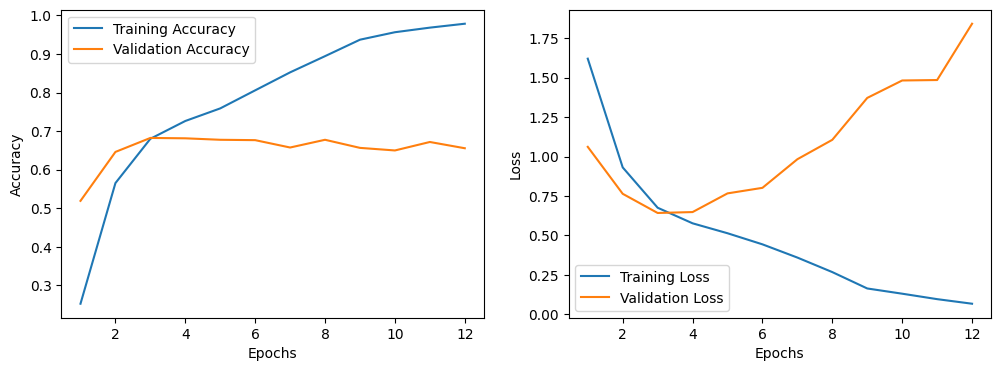

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your training and testing datasets
train_data_dir = "/content/drive/MyDrive/GADF_Train_Avg_1"
test_data_dir = '/content/drive/MyDrive/GADF_Test_Avg_1'

# Get the list of class labels
class_labels = sorted(os.listdir(train_data_dir))

# Set parameters
input_shape = (128, 128, 3)  # 3 is for RGB
num_classes = len(class_labels)
batch_size = 32
epochs = 12

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess training data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=1/7)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify 'training' for the training set
)

# Validation generator using the same data generator but with a different subset
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' for the validation set
)

# Load and preprocess testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: set shuffle to False for correct label matching
)

# Train the model with validation data
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model on the testing dataset
accuracy = model.evaluate(test_generator)[1]
print(f"Accuracy: {accuracy}")

# Access training history for plotting
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
